<a href="https://colab.research.google.com/github/ShimaMETU/CNG_562_HW_2/blob/master/Mohaghegh_Malaria_Cell_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Cell Images for Detecting Malaria***

predict whether a cell image is infected or not

# ***Mount the Google Drive to Google Colab***

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Download and unzip the Dataset***

In [7]:
!wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip  -d /content
!unzip /content/cell_images.zip -d /content/

DEBUG output created by Wget 1.19.4 on linux-gnu.

Reading HSTS entries from /root/.wget-hsts
URI encoding = ‘UTF-8’
Converted file name 'cell_images.zip' (UTF-8) -> 'cell_images.zip' (UTF-8)
--2019-05-21 11:11:30--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Caching ceb.nlm.nih.gov => 130.14.52.15 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
Created socket 3.
Releasing 0x00005558b8d20980 (new refcount 1).
Initiating SSL handshake.
Handshake successful; connected socket 3 to SSL handle 0x00005558b8ce2000
certificate:
  subject: CN=*.nlm.nih.gov,O=National Institutes of Health,L=Bethesda,ST=Maryland,C=US
  issuer:  CN=DigiCert SHA2 Secure Server CA,O=DigiCert Inc,C=US
X509 certificate successfully verified and matches host ceb.nlm.nih.gov

---request begin---
GET /proj/malaria/cell_images.zip HTTP/1.1
User-Agent: Wget/1.19.4 (linux-gnu)


# ***Reading dataset & Preprocessing***

All images will be resized to 224X224

we use binary_crossentropy loss, we need binary labels

In [8]:
from keras.preprocessing.image import ImageDataGenerator

directory_train_data = "/content/cell_images"

datagen = ImageDataGenerator(rescale=1./255,rotation_range=5,horizontal_flip=True,validation_split=0.2)
train_generator = datagen.flow_from_directory(directory_train_data,target_size=(100, 100),batch_size=100,class_mode='categorical',shuffle=True,subset='training')
val_generator = datagen.flow_from_directory(directory_train_data,target_size=(100, 100),batch_size=50,class_mode='categorical',shuffle=True, subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
train_generator.class_indices

data batch shape: (100, 100, 100, 3)
labels batch shape: (100, 2)


{'Parasitized': 0, 'Uninfected': 1}

# ***Creating CNN model***

In [12]:
import keras
from keras import layers
from keras import Sequential

model_cnn = Sequential()

model_cnn.add(layers.Conv2D(32,(3,3),input_shape=(100, 100, 3)))
model_cnn.add(layers.Conv2D(32,(3,3)))
model_cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(layers.Dropout(0.25))

model_cnn.add(layers.Conv2D(64,(3,3)))
model_cnn.add(layers.Conv2D(64,(3,3)))
model_cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(layers.Dropout(0.25))

model_cnn.add(layers.Conv2D(128,(3,3)))
model_cnn.add(layers.Conv2D(128,(3,3)))
model_cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(layers.Dropout(0.25))

model_cnn.add(layers.Conv2D(128,(3,3)))
model_cnn.add(layers.Conv2D(128,(3,3)))
model_cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(layers.Dropout(0.25))

model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(30, activation='tanh',name='Dence1'))
model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.Dense(20, activation='tanh',name='Dence2'))
model_cnn.add(layers.Dense(2, activation='softmax',name='output'))


model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
__________

# ***Compiling and Training CNN***

In [0]:
from keras import optimizers
model_cnn.compile(loss='categorical_crossentropy',optimizer=optimizers.SGD(lr=1e-3),metrics=['acc'])

history_cnn = model_cnn.fit_generator(train_generator,steps_per_epoch=230,epochs=80,validation_data=val_generator,validation_steps=110)

Epoch 1/80
230/230 [==============================] - 90s 390ms/step - loss: 0.6937 - acc: 0.5506 - val_loss: 0.6438 - val_acc: 0.6456
Epoch 2/80
230/230 [==============================] - 88s 382ms/step - loss: 0.6635 - acc: 0.6030 - val_loss: 0.6105 - val_acc: 0.7568
Epoch 3/80
230/230 [==============================] - 86s 375ms/step - loss: 0.6511 - acc: 0.6272 - val_loss: 0.5967 - val_acc: 0.7282
Epoch 4/80
230/230 [==============================] - 86s 376ms/step - loss: 0.6446 - acc: 0.6370 - val_loss: 0.5936 - val_acc: 0.7355
Epoch 5/80
230/230 [==============================] - 90s 389ms/step - loss: 0.6382 - acc: 0.6497 - val_loss: 0.5829 - val_acc: 0.7194
Epoch 6/80
230/230 [==============================] - 88s 382ms/step - loss: 0.6382 - acc: 0.6499 - val_loss: 0.5815 - val_acc: 0.7531
Epoch 7/80
230/230 [==============================] - 86s 376ms/step - loss: 0.6337 - acc: 0.6568 - val_loss: 0.5754 - val_acc: 0.7370
Epoch 8/80
230/230 [==============================] - 8

# ***Saveing my  model***

a HDF5/H5 file, which is a file format to store structured data, its not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.
(source:stackoverflow.com)

In [0]:
model_cnn.save("/content/drive/My Drive/Malaria_Cell_Images/model_cnn.h5")

# ***Training and validation accuracy***

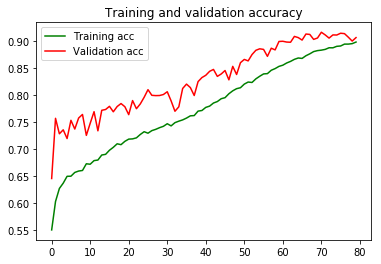

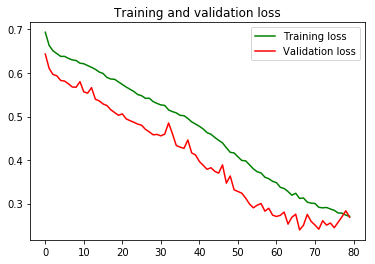

In [0]:
import matplotlib.pyplot as plt

acc = history_cnn.history['acc']
val_acc = history_cnn.history['val_acc']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# ***Loading VGG19 from keras***

In [9]:
import keras
from keras import layers
from keras import Sequential
from keras.applications import vgg19

conv_base = vgg19.VGG19(weights='imagenet',include_top=False,input_shape=(100, 100, 3))

        
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

# ***Adding fully connection to VGG19 model***

In [10]:
model_transfer_learning = Sequential()
model_transfer_learning.add(conv_base)
model_transfer_learning.add(layers.Flatten())
model_transfer_learning.add(layers.Dense(30, activation='tanh',name='Dence1'))
model_transfer_learning.add(layers.Dropout(0.5))
model_transfer_learning.add(layers.Dense(20, activation='tanh',name='Dence2'))
model_transfer_learning.add(layers.Dense(2, activation='softmax',name='output'))
model_transfer_learning.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
Dence1 (Dense)               (None, 30)                138270    
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
Dence2 (Dense)               (None, 20)                620       
_________________________________________________________________
output (Dense)               (None, 2)                 42        
Total params: 20,163,316
Trainable params: 20,163,316
Non-trainable params: 0
________________________________________________________________

# ***Training VGG19 model***

In [11]:
from keras import optimizers
model_transfer_learning.compile(loss='categorical_crossentropy',optimizer=optimizers.SGD(lr=1e-3),metrics=['acc'])

history_transfer_learning = model_transfer_learning.fit_generator(train_generator,steps_per_epoch=230,epochs=10,validation_data=val_generator,validation_steps=110)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
230/230 [==============================] - 123s 534ms/step - loss: 0.3652 - acc: 0.8303 - val_loss: 0.1694 - val_acc: 0.9411
Epoch 2/10
230/230 [==============================] - 111s 483ms/step - loss: 0.1511 - acc: 0.9547 - val_loss: 0.1675 - val_acc: 0.9463
Epoch 3/10
230/230 [==============================] - 111s 482ms/step - loss: 0.1434 - acc: 0.9572 - val_loss: 0.1572 - val_acc: 0.9496
Epoch 4/10
230/230 [==============================] - 112s 485ms/step - loss: 0.1315 - acc: 0.9618 - val_loss: 0.1642 - val_acc: 0.9484
Epoch 5/10
230/230 [==============================] - 111s 481ms/step - loss: 0.1327 - acc: 0.9599 - val_loss: 0.1756 - val_acc: 0.9440
Epoch 6/10
230/230 [==============================] - 112s 486ms/step - loss: 0.1251 - acc: 0.9612 - val_loss: 0.1489 - val_acc: 0.9520
Epoch 7/10
230/230 [==============================] - 110s 480ms/step - loss: 0.1271 - acc: 0.9606 - val_loss: 0.1706 - val_acc: 0.9456


# ***Saving VGG16 model***

In [0]:
model_transfer_learning.save("/content/drive/My Drive/Malaria_Cell_Images/model_transfer_learning.h5")

# ***Training and Validation accuracy***

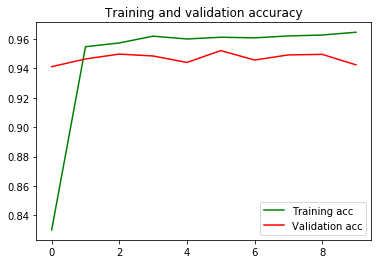

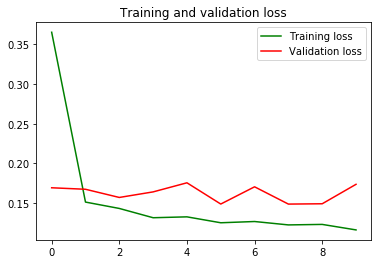

In [13]:
import matplotlib.pyplot as plt

acc = history_transfer_learning.history['acc']
val_acc = history_transfer_learning.history['val_acc']
loss = history_transfer_learning.history['loss']
val_loss = history_transfer_learning.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()